# Flare 2015/06/24
# CaIR

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [2]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [3]:
def timeframe_to_filename_fits(frame):
    if frame <0 or frame > 511:
        raise IndexError(f'frame number {frame} is not in (0, 511).')
    else:
        return f"fits\CaIR\crisp_l2_20150624_134006_8542_r00{frame+300}.fits"
ttff = timeframe_to_filename_fits

In [4]:
with f.open(timeframe_to_filename_fits(500)) as io :
    wvl = io[1].data
    print(wvl)
    
np.save('line_data/wav_sstCaIR.npy', wvl)

[8543.23999995 8543.33999998 8543.44       8543.53999996 8543.63999999
 8543.73999995 8543.83999998 8543.94       8544.03999999 8544.13999999
 8544.24       8544.34       8544.44       8544.54       8544.64
 8544.74000001 8544.84000001 8544.94       8545.04000002 8545.14000005
 8545.24000001 8545.34000004 8545.44       8545.54000002 8545.64000005]


In [5]:
time_list = []
for i in range(512):
    time_list.append(f.getheader(ttff(i))["DATE-AVG"][11:23])
# time_list

fits\CaIR\crisp_l2_20150624_134006_8542_r00300.fits
s=(25, 1550, 1498)
the shape of the data is (512, 1, 25, 1550, 1498)
the wavelengths are self._wavel = array([8543.23999995, 8543.33999998, 8543.44      , 8543.53999996,
       8543.63999999, 8543.73999995, 8543.83999998, 8543.94      ,
       8544.03999999, 8544.13999999, 8544.24      , 8544.34      ,
       8544.44      , 8544.54      , 8544.64      , 8544.74000001,
       8544.84000001, 8544.94      , 8545.04000002, 8545.14000005,
       8545.24000001, 8545.34000004, 8545.44      , 8545.54000002,
       8545.64000005], dtype='>f8')
(1550, 1498) (1550, 1498)
Boundary
Blue=Outside, yellow=Inside


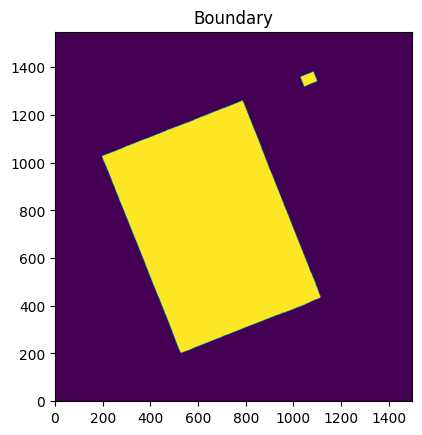

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [6]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaIR.npy', number_of_frames=512,
                 time=time_list, name_of_line='CaIR15', thresh=[0, 100000],  boundary_methode='search', boundary_arguments = {"error":0.001})

# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30]


In [7]:
CaIR.calculate__FOV_spect_over_time()

In [9]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{CaIR.shape=}')

the mean cadence is 13.696673189823871 for this line!
CaIR.shape=(512, 1, 25, 1550, 1498)


[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]
The guessed filters are [[3.666666666666667, 3.125], [12.0, 3.125], [20.333333333333332, 3.125]]


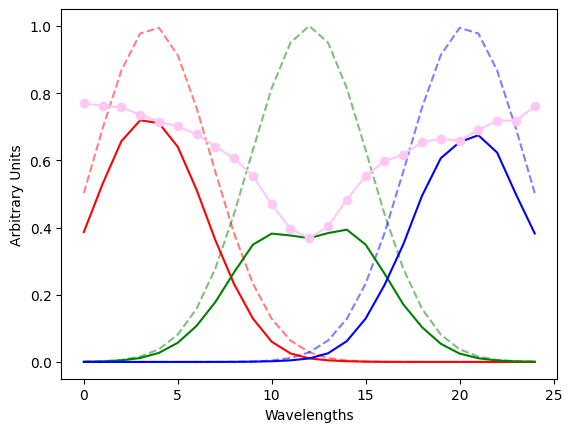

In [10]:
# %matplotlib inline
gf = un.guess_filters(15)
print(gf)
CaIR.update_filters(None)# [[3,2], [7,2], [11,2]]
CaIR.plot_filt(880,900)
plt.show()

TypeError: SST_data_from_multiple_fits_files.calculate_boundary() got an unexpected keyword argument 'error'

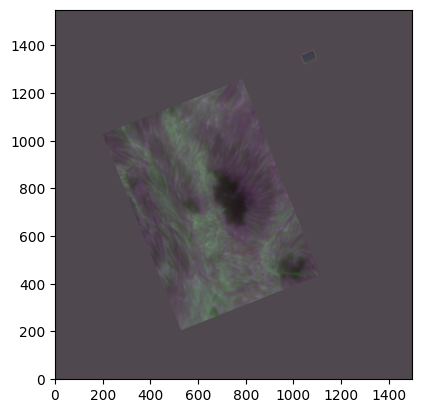

In [11]:
# %matplotlib widget
for frame in range(0,CaIR._number_of_frames, 100):
    # frame=0
    CaIR.ccp_frame(frame,Show=False)
    plt.imshow(CaIR.current_ccp, origin='lower')
    plt.imshow(CaIR.calculate_boundary(frame=frame, error=0.0005), alpha=0.2)

    # plt.imshow(CaIR.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

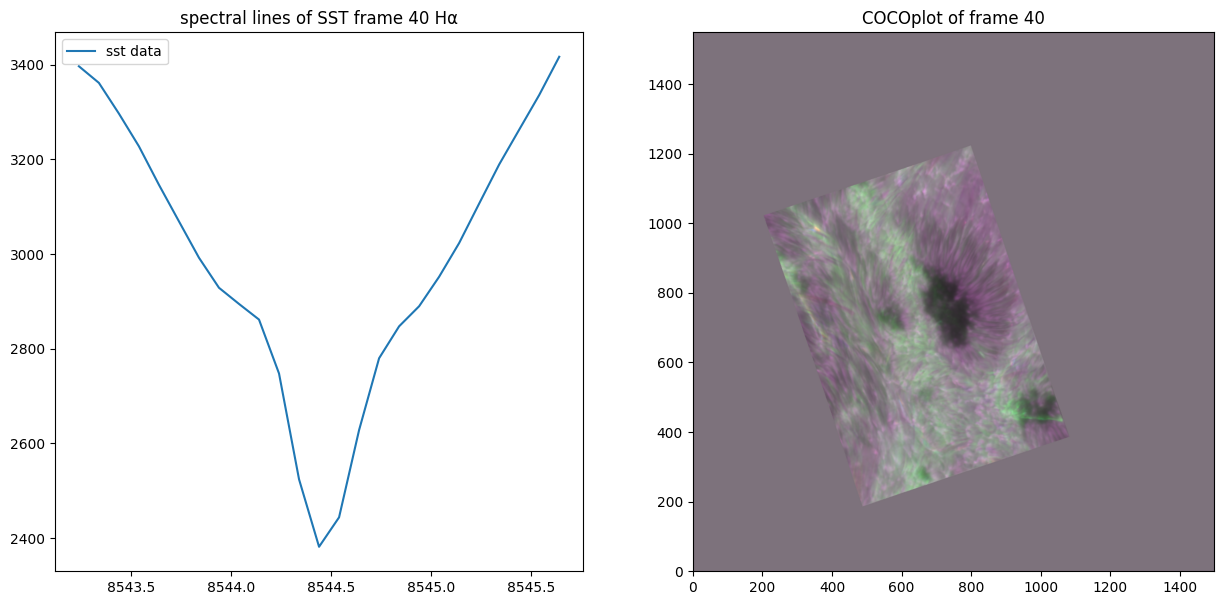

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
CaIR.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaIR.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

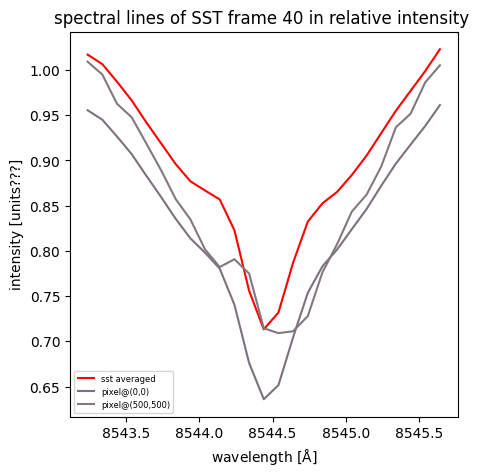

In [ ]:
CaIR.current_ccp[0:30:10,0:60:20,:]
CaIR.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

In [ ]:
print('Updated sys.path:', sys.path)
atlas = f.getdata('D:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
atlas

Updated sys.path: ['d:\\solar flares\\data\\2015-06-24', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'D:/solar flares/data/2017-09-06', 'D:/solar flares/data/2017-09-06']


array([0.91304463, 0.91184324, 0.88306457, ..., 1.0017935 , 1.0030575 ,
       1.0040228 ], dtype='>f4')

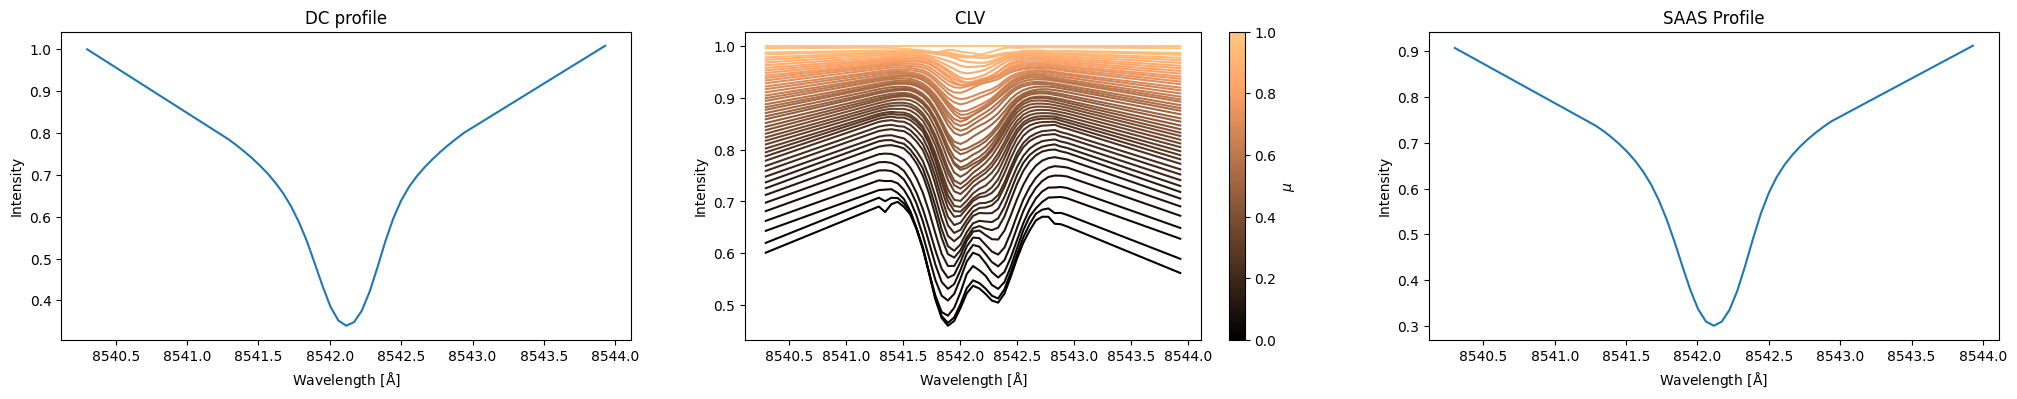

crisp::read_reflectivity: (RL,RH)[8542.114877954633] = (0.851550166761555, 0.9299031666516842)


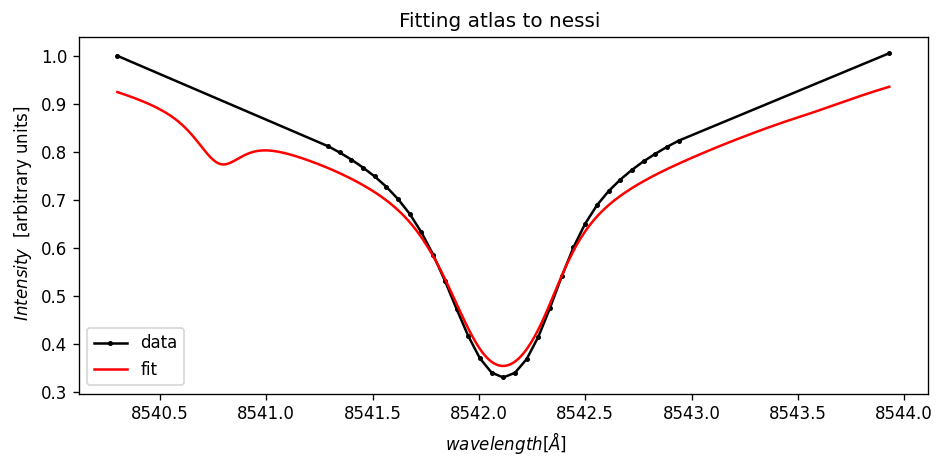

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 188.94961130787743
        x: [-2.363e+00  9.456e-02  1.176e+00]
      nit: 2
      jac: [ 1.020e+02 -1.016e+02  0.000e+00]
 hess_inv: [[ 3.139e-03 -1.662e-04  0.000e+00]
            [-1.662e-04  8.868e-06  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 177
     njev: 42
de p-waarde is  0.9999987907929883 
Chi^2 reduced= 6.298320376929248 
aantal vrijheidgraden= 30 
chi^2= 188.94961130787743
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9999987907929883 
Oftewel verwerp als p-waarde <lpha-niveau 


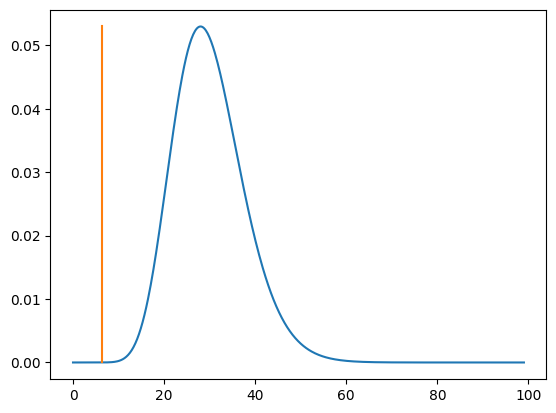

3504


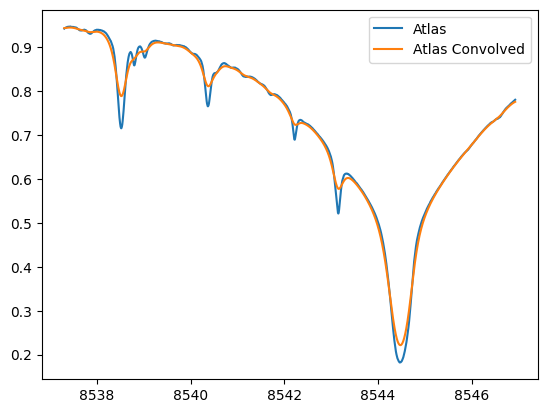

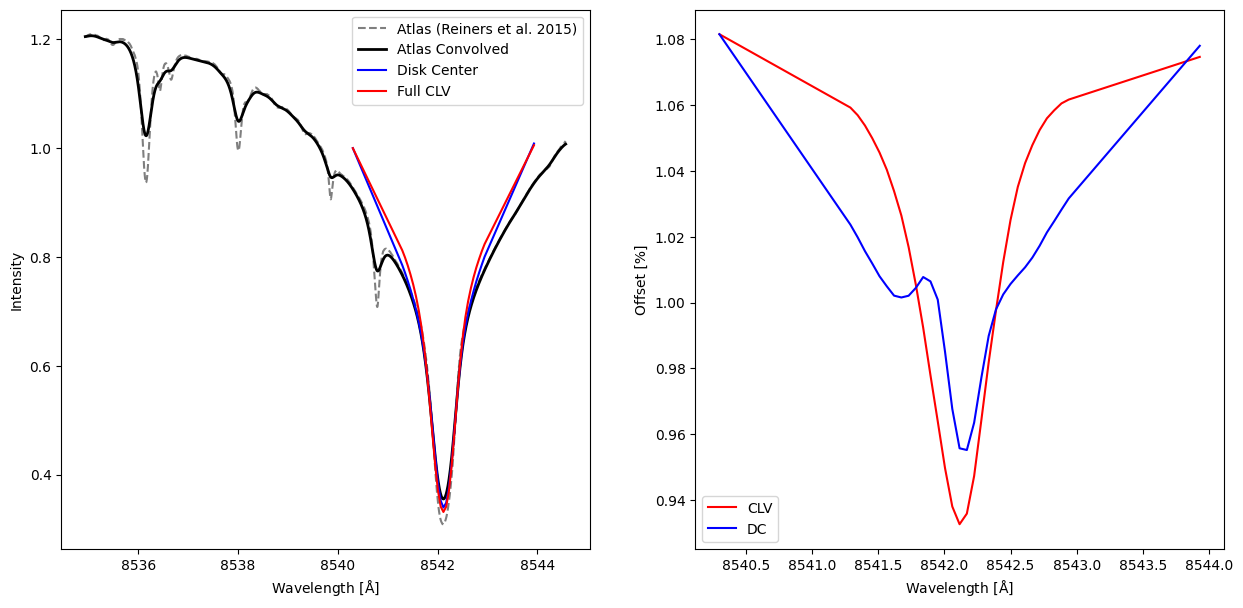

8542.114877954633 8542.114877954633


In [ ]:

theor_CaIR = un.linestudier('D:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=atlas, nr=101)
theor_CaIR.saas_profile_atlas_check(show_all=True)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [ ]:
CaIR.shape

(512, 1, 25, 1550, 1498)

In [ ]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaIR.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = 492.772 y= 174.558


[462.772, 522.7719999999999, 144.558, 204.558]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8411643020513465 for timeframe 0


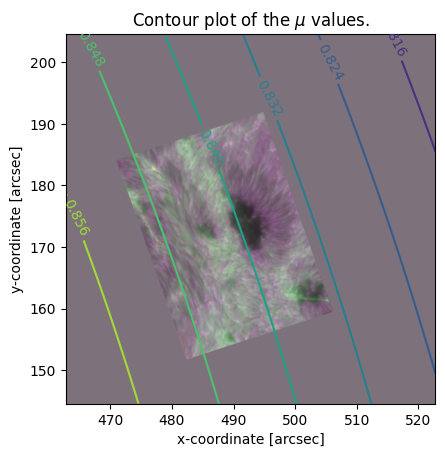

In [ ]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 60

position = (492.772, 174.558)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaIR.shape[4])
y = np.linspace(fyp[0], fyp[1], CaIR.shape[3])

X, Y = np.meshgrid(x, y)

MU = calculate_mu(X,Y)


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(frame, Show=False)
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        av_mu = np.average(MU, weights=over.boundary)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

    if over is not None:
        return av_mu
    
mu = give_mu_contourplot(MU, X, Y, fxp, over=CaIR)

sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


## Finding a suitable quiet sun patch

In [ ]:
scaler = CaIR.av_spect[0]
frame, CaIR.shape

(40, (512, 1, 25, 1550, 1498))

In [ ]:
# def qs_visualization(sst_data, frame, xlim, ylim):
#     fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

#     sst_data.ccp_frame(frame,Show=False)


#     ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
#     CaIR.frame_integrated_spect(frame)
#     ax[0].plot(CaIR._wavel, CaIR.av_spect/scaler, label='sst data')
#     ax[0].plot(theor_CaIR.sst_wav, theor_CaIR.saas_profile, label='saas nessi')
#     ax[0].legend()
#     ax[1].imshow(sst_data.current_ccp, origin='lower')
#     ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]])
#     ax[1].set_title("COCOplot of frame "+str(frame))
#     plt.show()

# def quiet_sun(sst_data, frame, xlim, ylim, show=False, color='blue'):
#     sst_data.quiet_sun = [frame, xlim, ylim]
#     sst_data.quiet_spect=sst_data.area_av_spect(frame, xlim, ylim)
#     sst_data.ccp_frame(frame, Show=False)
#     plt.imshow(sst_data.current_ccp, origin='lower')
#     plt.plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

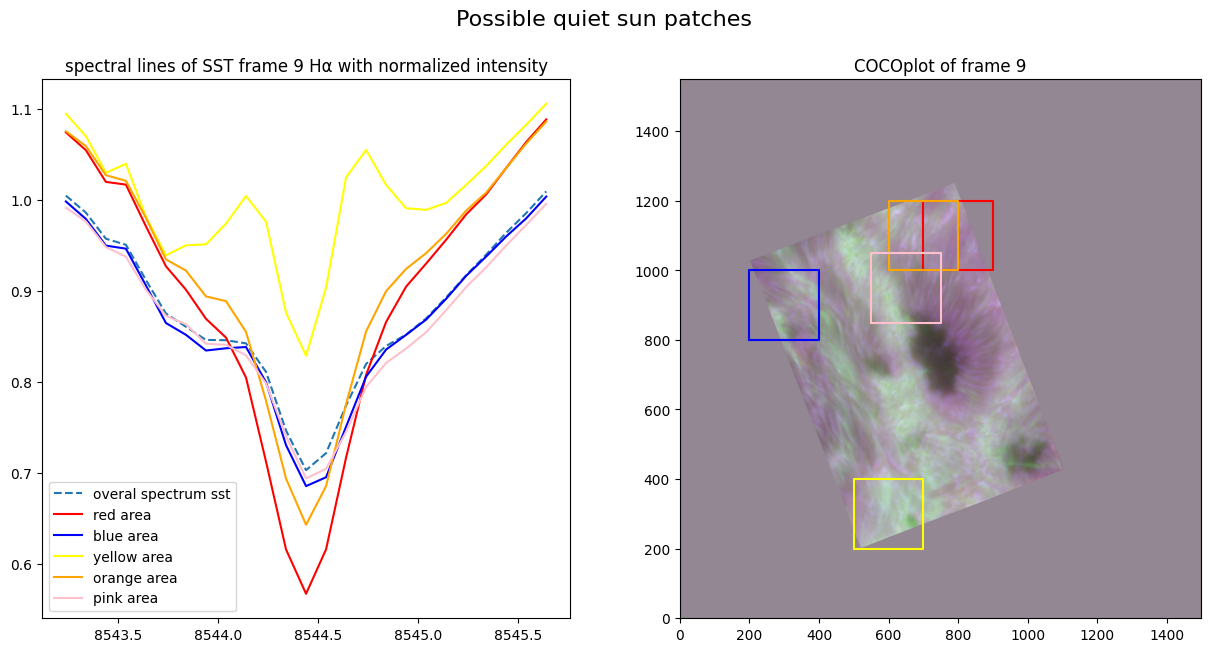

In [ ]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaIR.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(600,800),(1000,1200)], [(550,750),(850, 1050)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.sst_clv[12] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(CaIR.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaIR._wavel, CaIR.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (200, 400) and ylim: (800, 1000)


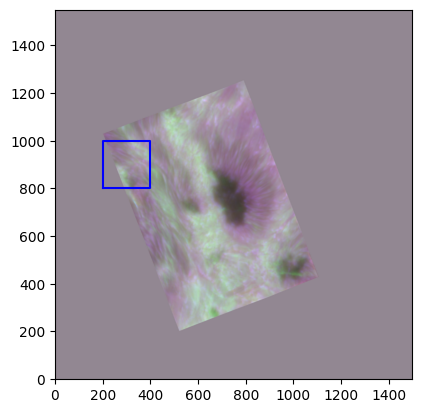

In [ ]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)


[0.00419696 0.00393117 0.00351019 0.00419838 0.00354157 0.00343976
 0.00359519 0.00370452 0.00426759 0.00546671 0.00645843 0.00664938
 0.00638085 0.00641467 0.00682696 0.00627902 0.00531039 0.00481759
 0.00454043 0.00445972 0.00486566 0.00536517 0.00538664 0.00567425
 0.00581946]


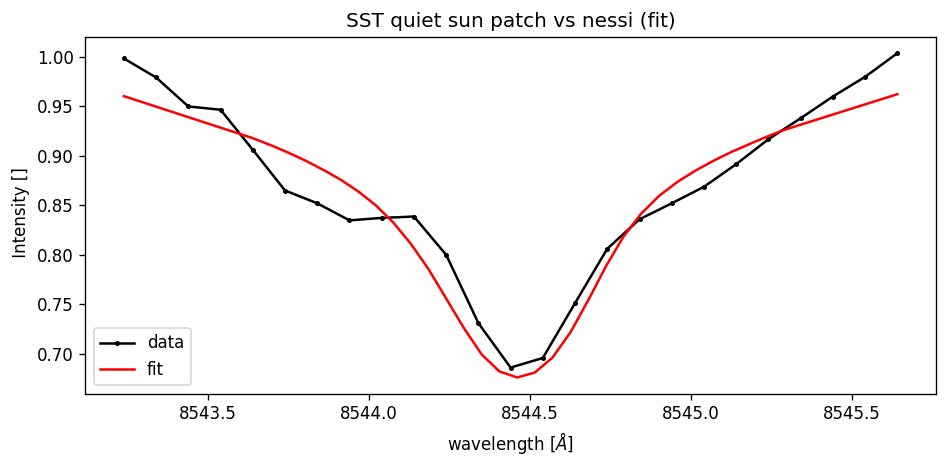

de p-waarde is  0.0 
Chi^2 reduced= 4187.000875186011 
aantal vrijheidgraden= 22 
chi^2= 92114.01925409226
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


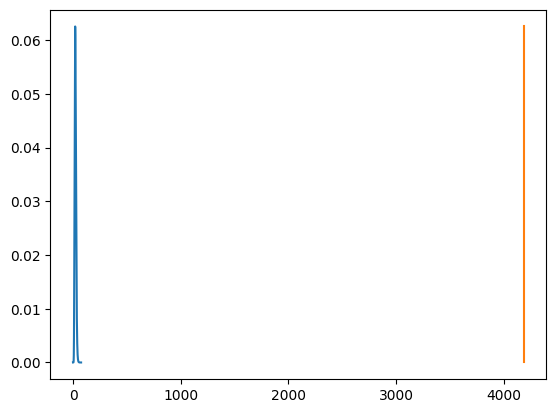

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 92114.01925409226
        x: [ 2.345e+00  5.027e-01  5.439e-01]
      nit: 18
      jac: [ 3.906e-03  5.469e-02  3.027e-02]
 hess_inv: [[ 1.247e-07  4.353e-08 -6.231e-08]
            [ 4.353e-08  3.285e-08 -3.122e-08]
            [-6.231e-08 -3.122e-08  4.323e-08]]
     nfev: 104
     njev: 26

In [ ]:
import data_analysis as da
# theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
# theta = [0.2, 0.3, 0.89]

f_nessi_clv = lambda theta: interp1d(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")


g = len(CaIR._wavel)

# dY = np.where(theor_CaIR.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_CaIR.sst_wav, 0.01, 10)

#To simulate a specific domain around the well we cam make the errors on the wings huge
avs = CaIR.frame_integrated_spect(CaIR.quiet_sun['frame'], CaIR.quiet_sun['xlim'], CaIR.quiet_sun['ylim'], variation=True)
stds = CaIR.var_spect/(400*230)**0.5
print(stds)
data = [CaIR._wavel,  avs /scaler,stds/scaler,np.zeros(g)+0.01]

mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=np.array([1.5, -0.111, 1.26]), fout_model=None, plot=False)
                                                                #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = mini['x']
CaIR.theta_nessi_to_quiet_sun = theta
da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="SST quiet sun patch vs nessi (fit)",labelx="wavelength $[\AA]$",
             labely=" Intensity []" , error=False)
da.kwaliteit_fit(data, mini)

mini

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

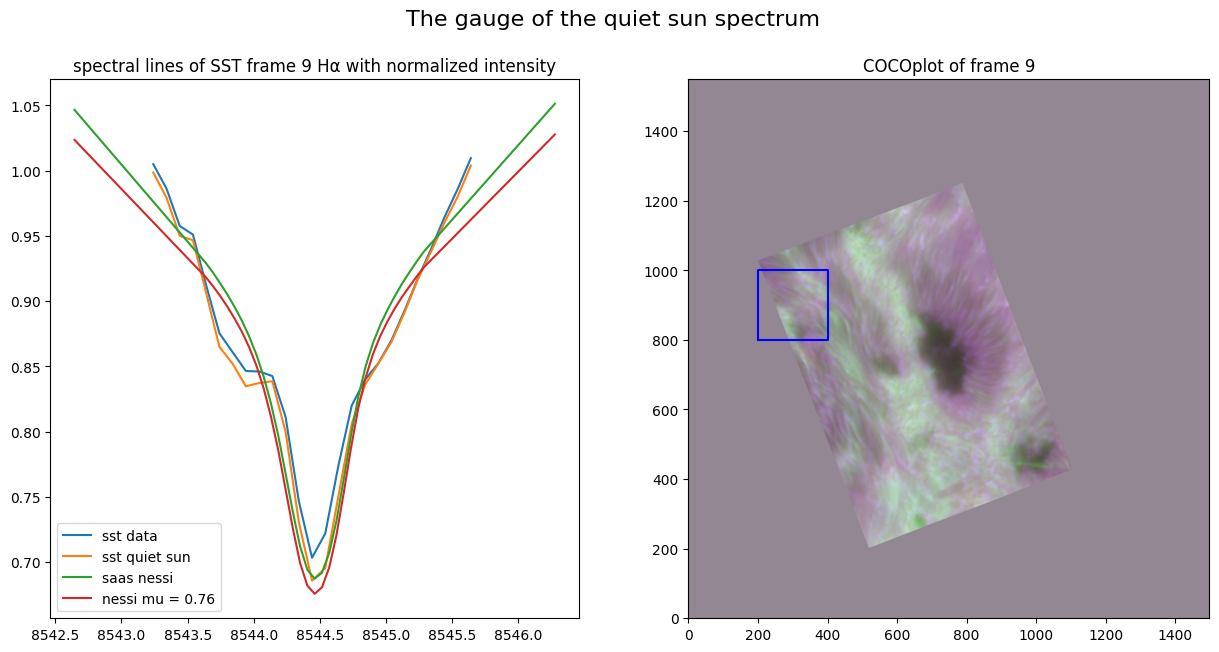

In [ ]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

CaIR.ccp_frame(frame,Show=False)



ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect/scaler, label='sst data')
ax[0].plot(CaIR._wavel, CaIR.quiet_spect/scaler, label='sst quiet sun') #

ax[0].plot(theor_CaIR.sst_wav + theta[0], f_nessi(theta)(theor_CaIR.sst_wav + theta[0]), label='saas nessi')
ax[0].plot(theor_CaIR.sst_wav + theta[0], f_nessi_clv(theta)(theor_CaIR.sst_wav + theta[0]), label='nessi mu = 0.76')
ax[0].legend()
ax[1].imshow(CaIR.current_ccp, origin='lower')
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

AttributeError: 'SST_data_from_multiple_fits_files' object has no attribute 'theta_nessi_to_quiet_sun'

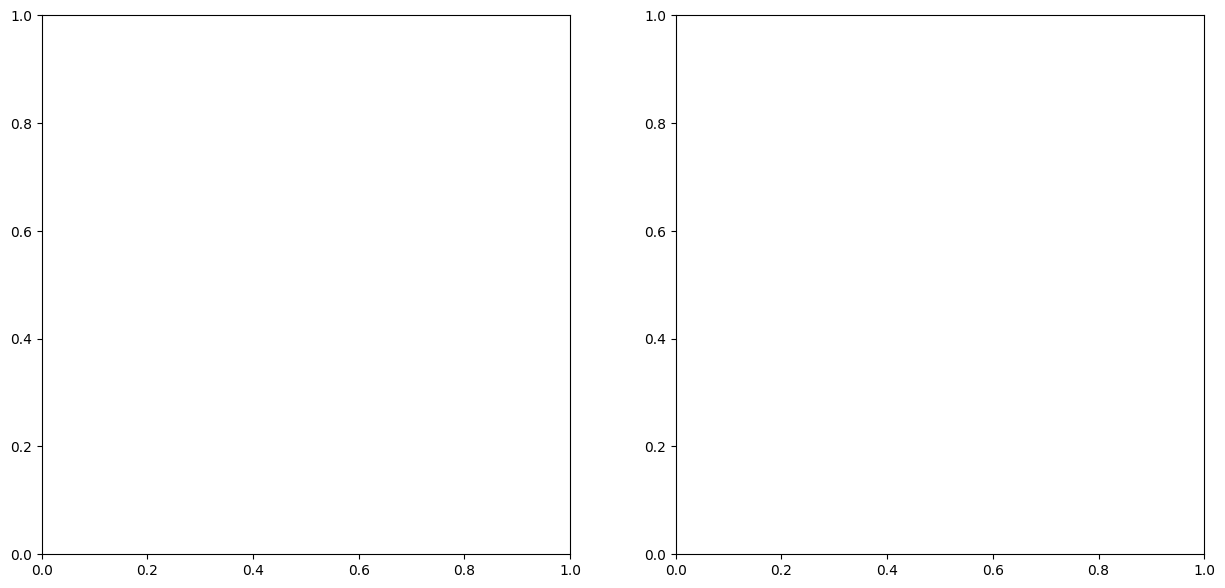

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# line_quiet_sun, = ax[0].plot(CaIR._wavel, CaIR.quiet_spect/scaler, label='quiet sun spectr')
CaIR.frame_integrated_spect(frame)
CaIR.ccp_frame(frame,Show=False)


theor_line = theor_Ha
sst_data = Ha
wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(sst_data._wavel, sst_data.av_spect/sst_data.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=CaIR.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# CaIR.ccp_frame(frame,Show=False)
Ha_tstr=(f"Ha t={CaIR._time[frame][0:-7]} UT")

Ha_tstr=Ha_tstr[2:5]+Ha_tstr[7:15]+Ha_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: "+str(frame)+Ha_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.sst_clv[12] + theta[1], label='nessi mu = 0.76')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(CaIR.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [ ]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 0.09762416065070584 		 this is an increase of  7688.681935738815 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 0.9762416065070584 		 this is an increase of  76886.81935738814 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [ ]:
sst_data = Ha
CaIR.shape

(512, 1, 25, 1550, 1498)

In [ ]:
CaIR.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

In [ ]:
sst_data.quiet_sun

AttributeError: 'SST_data_from_multiple_fits_files' object has no attribute 'quiet_sun'

D:\solar flares/data/2017-09-06\use_nessi3.py:1472: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
D:\solar flares/data/2017-09-06\use_nessi3.py:1463: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
D:\solar flares/data/2017-09-06\use_nessi3.py:1460: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])
D:\solar flares/data/2017-09-06\use_nessi3.py:1460: IntegrationWarning: The occurrence o

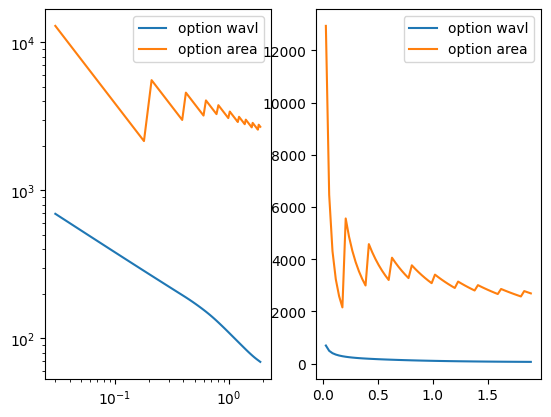

STD_Area = array([25878.79817616, 12939.39908808,  6469.69954365,  4313.13302919,
        3234.84977192,  2587.87981749,  2156.56651459,  5562.78074238,
        4867.43314953,  4326.60724405,  3893.94651966,  3539.95138148,
        3244.95543304,  2995.34347666,  4580.39981298,  4275.03982542,
        4007.84983634,  3772.09396363,  3562.53318785,  3375.03144113,
        3206.27986908,  4059.68142095,  3875.15044728,  3706.66564523,
        3552.22124333,  3410.1323936 ,  3278.97345539,  3768.87297556,
        3634.27036929,  3508.95070139,  3391.985678  ,  3282.56678517,
        3179.98657313,  3083.62334364,  3412.24371782,  3314.75104017,
        3222.67462238,  3135.57530827,  3053.06016858,  2974.77657452,
        2900.40716015,  3145.5034494 ,  3070.61051013,  2999.20096338,
        2931.03730512,  2865.90314279,  2803.60090055,  3008.9994089 ,
        2946.31192121,  2886.18310649,  2828.45944436,  2772.99945526,
        2719.67254265,  2668.35796638,  2861.66821921,  2809.63788

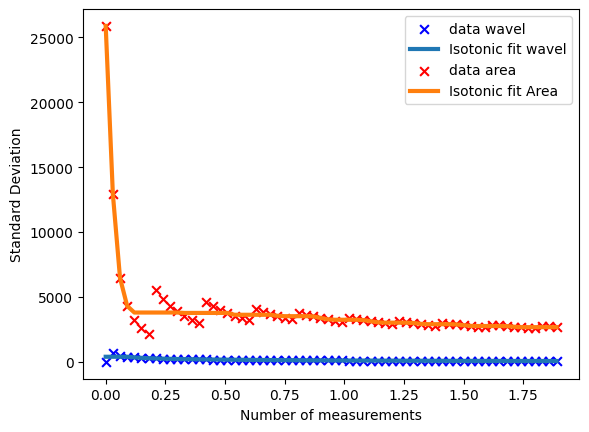

D:\solar flares/data/2017-09-06\use_nessi3.py:1537: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.21\AA$.
at an intesity of 1.2813806514895898e-08. For a standard deviation of 3804.29482280495.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=1.89\AA$.
at an intesity of 3.6860620047651405e-07. For a standard deviation of 69.50907495792892.



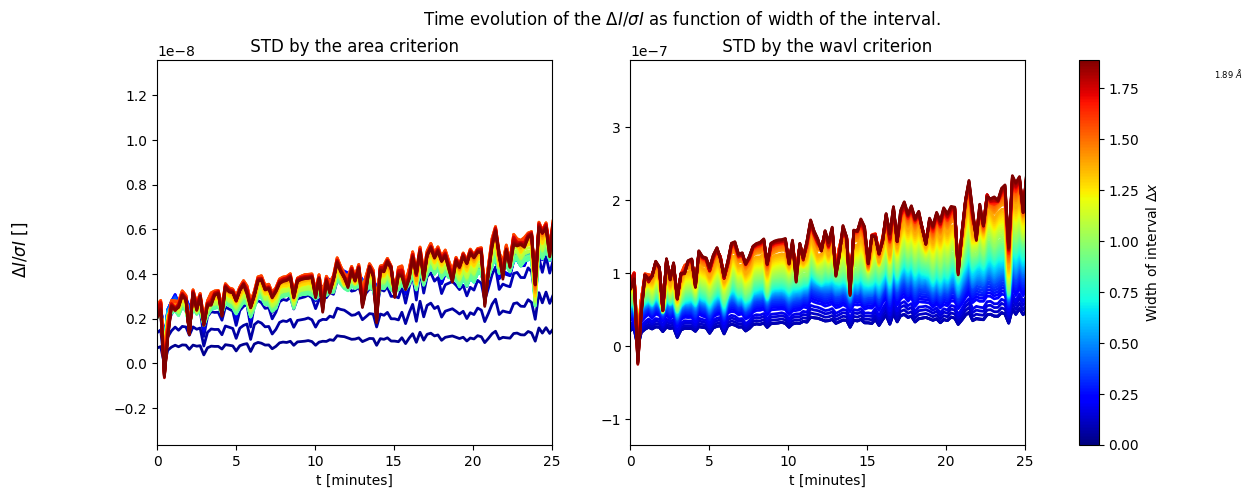

D:\solar flares/data/2017-09-06\use_nessi3.py:1681: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


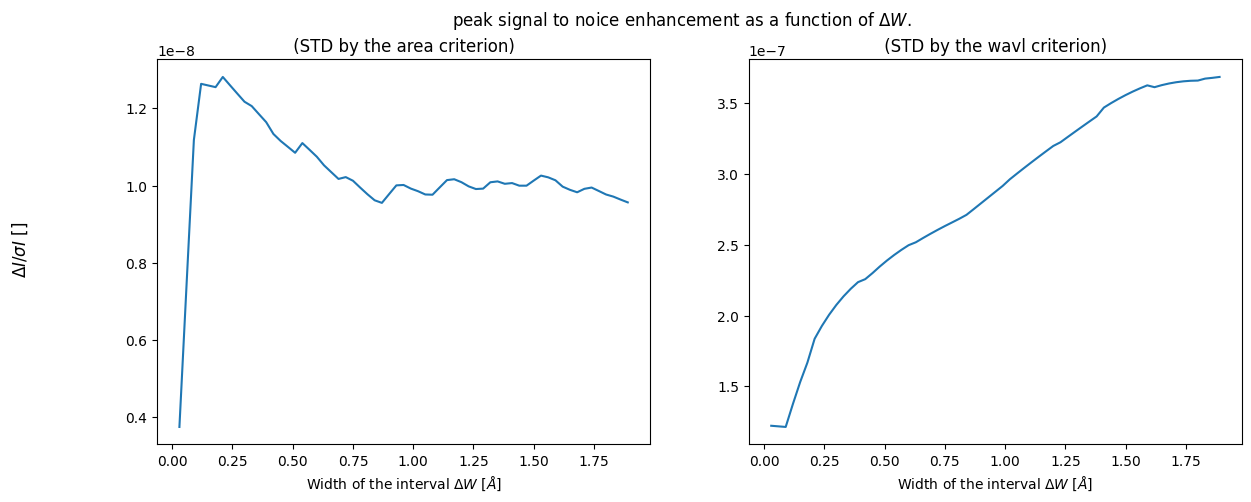

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 6.77376065e-10,  7.42739779e-10, -5.04519422e-11, ...,
         -1.21336078e-10, -1.13692319e-10, -2.22407186e-10],
        [ 1.36064794e-09,  1.48923696e-09, -5.48675509e-11, ...,
         -2.35302269e-10, -2.16414558e-10, -4.36799726e-10],
        ...,
        [ 2.10452928e-09,  2.46984249e-09, -5.45021926e-10, ...,
          9.72849622e-10,  1.19158049e-09,  6.95770198e-10],
        [ 2.05318426e-09,  2.42762827e-09, -5.76602175e-10, ...,
          9.67268117e-10,  1.18593342e-09,  6.92105261e-10],
        [ 2.00608619e-09,  2.38747678e-09, -6.04128362e-10, ...,
          9.62651155e-10,  1.18162182e-09,  6.89699085e-10]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 2.20326634e-08,  2.41587153e-08, -1.64102441e-09, ...,
         -3.94663628e-09, -3.69801166e

In [ ]:
reload(un)
un.analyse_optimal_interval(sst_data=CaIR, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

In [ ]:
sst_data = CaIR

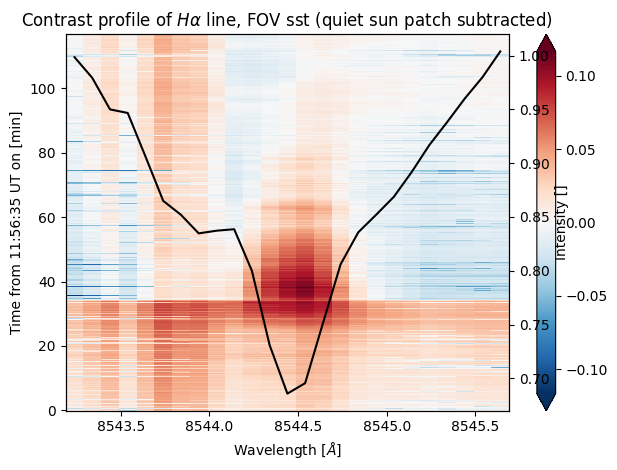

In [ ]:
FOV_spectrum = CaIR.FOV_spectrum
QS = sst_data.quiet_spect/sst_data.scalar
Z = FOV_spectrum - QS
x = sst_data._wavel
y = CaIR.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

For FOV with Nessi normalisation (of course fit to the quiet sun patch)

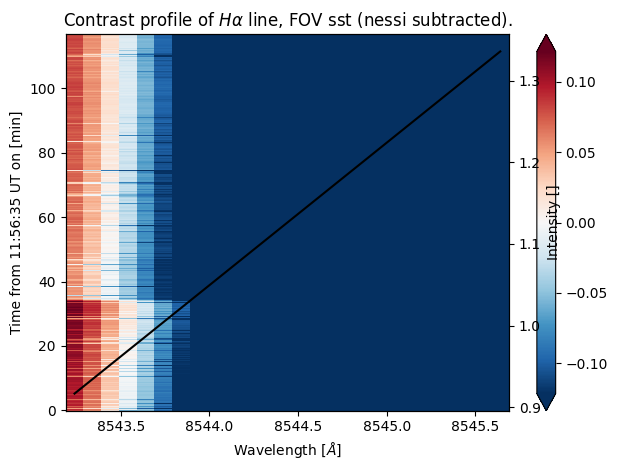

In [ ]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_CaIR

f_nessi_clv = interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
QS = f_nessi_clv(sst_data._wavel)

Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The longer stripes here on the contrast plot come from the differences between nessi en quiet sun which was not an as good fit as hoped

### For the full disk profile

(512, 25) [1.         0.99292664 0.96240797 0.90871269 0.92784941 0.90479543
 0.88196697 0.87039217 0.85485257 0.8500009  0.81473249 0.74723935
 0.70501962 0.72242404 0.7775192  0.82539132 0.84179159 0.85647652
 0.87401561 0.896434   0.91983164 0.94302998 0.96622927 0.98762237
 1.01099098] [8543.23999995 8543.33999998 8543.44       8543.53999996 8543.63999999
 8543.73999995 8543.83999998 8543.94       8544.03999999 8544.13999999
 8544.24       8544.34       8544.44       8544.54       8544.64
 8544.74000001 8544.84000001 8544.94       8545.04000002 8545.14000005
 8545.24000001 8545.34000004 8545.44       8545.54000002 8545.64000005]


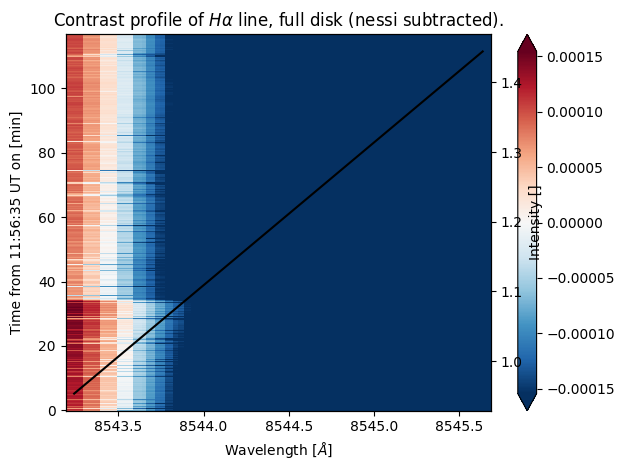

In [ ]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

print(np.shape(FOV_spectrum), FOV_spectrum[0], sst_data._wavel)
# print([(interp1d(sst_data._wavel, FOV_spectrum[0], kind='linear', fill_value="extrapolate")(wav)) for i in range(np.shape(FOV_spectrum)[0])])
# print(f_sst(wav))

areafactor = 60**2 / (np.pi*950**2)


# relative = sst_full / f_nessi(theta)(wav)


QS_clv = f_nessi_clv(theta)(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

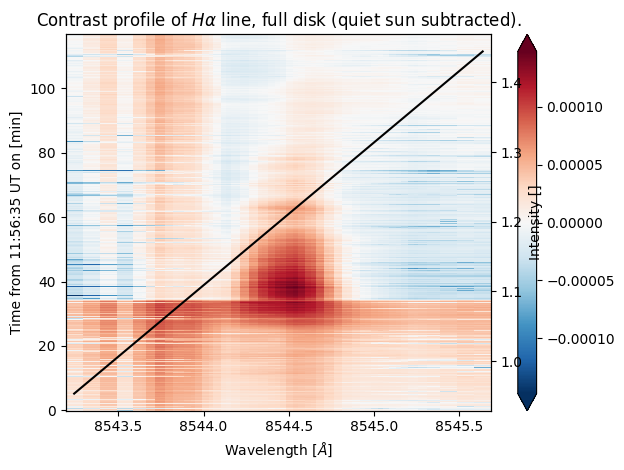

In [ ]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]


wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_sun_patch_clv = interp1d(sst_data._wavel, sst_data.quiet_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

QS_from_qs_patch = f_sun_patch_clv(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - QS_from_qs_patch)

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_from_qs_patch)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (quiet sun subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








In [ ]:
import scipy

def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(sst_data._number_of_frames):
        DS = areafactor * (interp1d(sst_data._wavel, sst_data.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW


The equivalent width calculated in its difference to nessi 

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8532\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


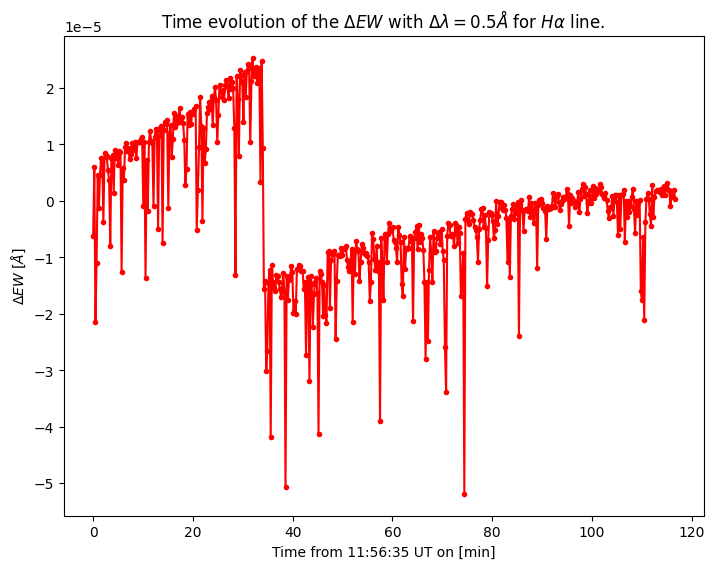

In [ ]:
DEW = differenced_equivalent_width(sst_data = CaIR, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
ax1.plot(TIME, DEW, '-o', color='r', label=r'$\Delta EW$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line. ')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend()
plt.show()

The equivalent width calculated in its difference to the quiet sun patch

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8532\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


[-6.243909677569806e-06, 5.948551142483373e-06, -2.1510099805267104e-05, -1.1010066009851825e-05, 4.536554505230977e-06, -1.2769483859375673e-06, 4.666341521162178e-06, 7.570438689906256e-06, 6.9203003172864215e-06, -3.702486736535849e-06, 8.530058622039797e-06, 7.809338917079503e-06, 7.911126311894073e-06, 5.402599766587344e-06, 3.6906046533959503e-06, -7.919995317453812e-06, 7.645635832337277e-06, 8.220520054982374e-06, 1.4519496684355424e-06, 9.048504838721173e-06, 7.598283223312113e-06, 8.344618436531512e-06, 6.411450263720374e-06, 8.883897334130686e-06, 8.753316851295532e-06, -1.2527849055795459e-05, 5.8073011168890395e-06, 3.6836496647534124e-06, 9.484650695655543e-06, 1.0199525279718173e-05, 8.82350191191139e-06, 9.333878784211733e-06, 7.470229184387537e-06, 8.345925288302933e-06, 1.0310779254630388e-05, 9.007388175084102e-06, 9.617301265285623e-06, 1.0372847282722852e-05, 7.5961335361126805e-06, 1.0458530339625606e-05, 1.0470712172427992e-05, 1.0418186103408101e-05, 1.093865016

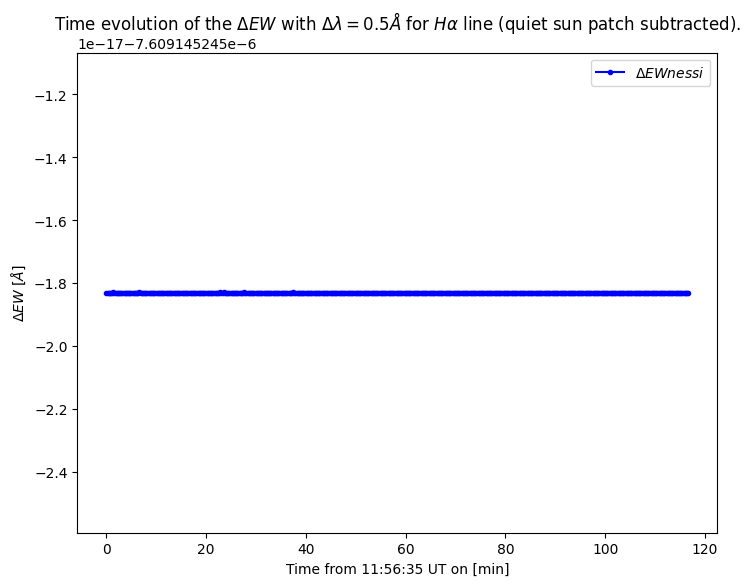

In [ ]:
DEW2 = differenced_equivalent_width(sst_data = CaIR, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_sun_patch_clv, wav=wav, Dlambda= 0.5)
# DEW = differenced_equivalent_width(sst_data = Ha, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
print(DEW, DEW2)
# ax1.plot(TIME, DEW2 - np.min(DEW2)+0.00001, '-o', color='r', label=r'$\Delta EW$ QSP', markersize=3)
# ax1.plot(TIME, DEW - np.min(DEW), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.plot(TIME, np.array(DEW) - np.array(DEW2), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line (quiet sun patch subtracted).')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend
ax1.legend()
plt.show()

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?

bring it to the disk center scale it en than put it on its spot again wit center to limb variation

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [ ]:
un.save_for_further_analysis(CaIR, theor_CaIR)
